In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# If you are working on your local editor instead of on Colab, you could skip the below
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


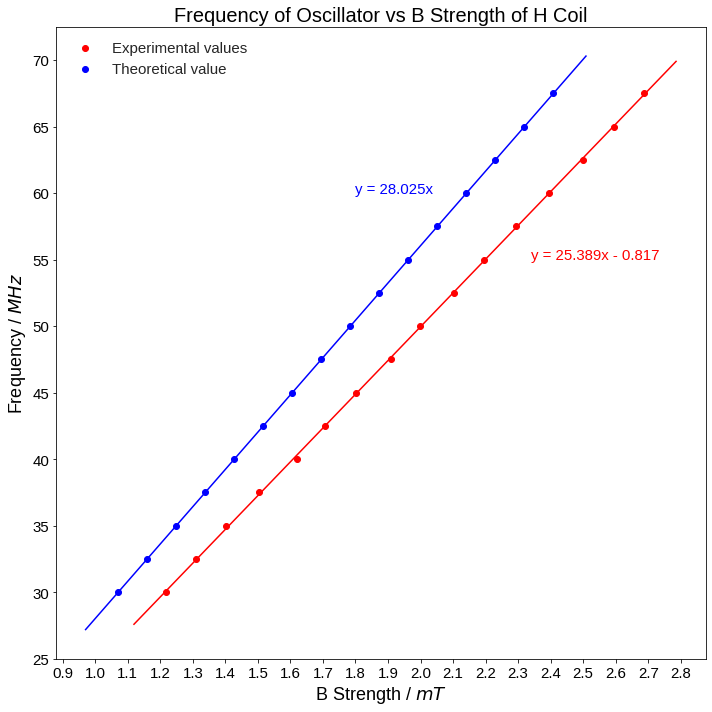

k = 25.389
g-value is 1.78
The deviation between experimental g_s value and the theoretical value is 10.99%


In [2]:
# Read the csv into df, if you are working locally, include the local path of your csv file
df = pd.read_csv("/content/drive/MyDrive/Y2S1/PC2193/EP with Zhuming <3/Experiment_B/ESR.csv")


# Extract data frequency and DC current from the csv
freq = df["f / MHz"]
DC = df["I_DC / A"]


# Calculation of magnetic field B for every value of f and I
miu_0 = 1.25663706 * 10**(-6)
n = 320
r = 0.135/2
B = miu_0*((4/5)**(3/2))*(n/r)*(DC)
df["Magnetic Field / mT"] = B*1000
B = df["Magnetic Field / mT"]

# Construct of best-fit line using numpy polyfit function
m, c = np.polyfit(B, freq, 1)
X = np.array(np.linspace(min(B)-0.1, max(B)+0.1, len(B)))
Y = m*X + c

# Construct theoretical value for B
miu_B = 9.274 * (10**(-21))
h = 6.62607015 * 10**(-31)
g_st = 2.002319
B_t = (freq*10**6)*h/(g_st*miu_B)*1000

# Construct of best-fit line for theoretical values
m_t, c_t = np.polyfit(B_t, freq, 1)
X_t = np.array(np.linspace(min(B_t)-0.1, max(B_t)+0.1, len(B_t)))
Y_t = m_t*X_t + c_t

# Plotting
plt.figure(figsize = (10,10))
plt.scatter(B, freq, color = "r", label = "Experimental values")
plt.plot(X, Y, "r")
plt.scatter(B_t, freq, color = "b", label = "Theoretical value")
plt.plot(X_t, Y_t, "b")


plt.xlabel("B Strength / ${mT}$", size = 18)
plt.ylabel("Frequency / $MHz$", size = 18)
plt.xticks(np.arange(0.9, 2.9, 0.1), fontsize = 15)
plt.yticks(np.arange(25, 75, 5), fontsize = 15)
plt.style.use("seaborn")
plt.title("Frequency of Oscillator vs B Strength of H Coil", fontsize = 20)
plt.text(1.8, 60, f"y = {round(m_t,3)}x", fontsize = 15, color = 'b')
plt.text(2.34, 55, f"y = {round(m,3)}x - {-round(c,3)}", fontsize = 15, color = 'r')
plt.legend(fontsize = 15)
plt.tight_layout()

plt.show()

# The value of k is the slope 
print(f'k = {round(m, 3)}')

# Determean the experimental g_s value and compare with the theoretical value
g_s = h*(freq*10**6)/(miu_B * (B/1000))
g_s = np.mean(g_s)
print(f'g-value is {round(g_s, 2)}')
deviation = ((g_st - g_s)/g_st) * 100
print(f'The deviation between experimental g_s value and the theoretical value is {round(deviation,2)}%')
